**BREAST CANCER DETECTION**

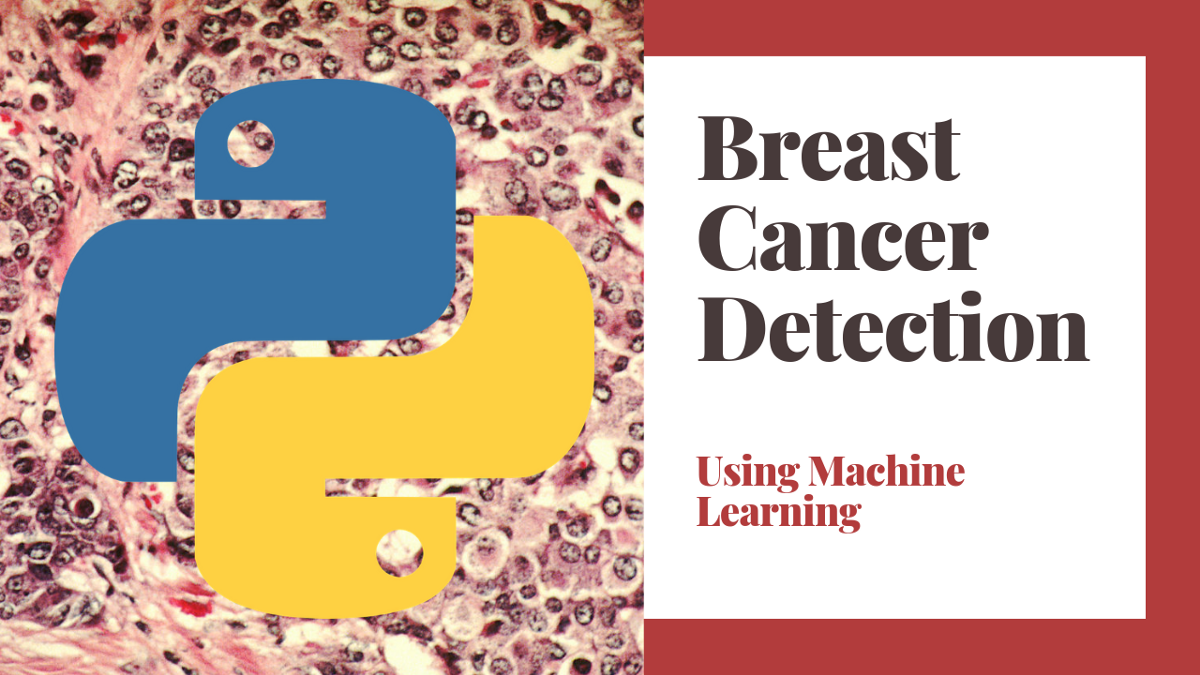

In [ ]:
 #IMPORTING REQUIRED LIBRARIES
 from sklearn.datasets import load_breast_cancer
 from sklearn.preprocessing import StandardScaler

 import pandas as pd
 import numpy as np

 from keras.models import Sequential
 from keras.layers import Dense

In [ ]:
#LOADING THE DATASET 
data = load_breast_cancer()

In [ ]:
data #we get dictionary, key value pairs 

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
data.keys() #finding keys

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
dscr =data['DESCR']

In [ ]:
# ALL THE DESCRIPTION ABOUT THE DATA
print(dscr) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
#data about the data
print(data['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
#size of dataset
data['data'].shape

(569, 30)

In [ ]:
#names of features (columns) in the datasets
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data['data'] #data of all tumors

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
data['data'][0] #data of first tumor only

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [ ]:
#data mapping of first tumor to the feature names
j = 0
for i in data['feature_names']:
  print(i, ':' ,data['data'][0][j])
  j+=1

mean radius : 17.99
mean texture : 10.38
mean perimeter : 122.8
mean area : 1001.0
mean smoothness : 0.1184
mean compactness : 0.2776
mean concavity : 0.3001
mean concave points : 0.1471
mean symmetry : 0.2419
mean fractal dimension : 0.07871
radius error : 1.095
texture error : 0.9053
perimeter error : 8.589
area error : 153.4
smoothness error : 0.006399
compactness error : 0.04904
concavity error : 0.05373
concave points error : 0.01587
symmetry error : 0.03003
fractal dimension error : 0.006193
worst radius : 25.38
worst texture : 17.33
worst perimeter : 184.6
worst area : 2019.0
worst smoothness : 0.1622
worst compactness : 0.6656
worst concavity : 0.7119
worst concave points : 0.2654
worst symmetry : 0.4601
worst fractal dimension : 0.1189


In [ ]:
data['target'] 
#we get all zeros and ones| We gave labels as 0 & 1 | 0 = MALIGNANT, 1 = BENIGN

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#name of the targets
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#location of dataset in our system
data['filename']

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/breast_cancer.csv'

In [ ]:
feature = data['data']

In [ ]:
feature

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
feature.shape

(569, 30)

In [ ]:
label = data['target']

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
label.shape

(569,)

In [ ]:
#scaling the data in a particular range using standard scaler
scale = StandardScaler()
feature = scale.fit_transform(feature)
feature

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
#data mapping of first tumor to the feature names after standardising the data
j = 0
for i in data['feature_names']:
  print(i, ':' ,feature[0][j])
  j+=1

mean radius : 1.0970639814699807
mean texture : -2.0733350146975935
mean perimeter : 1.2699336881399383
mean area : 0.9843749048031144
mean smoothness : 1.568466329243428
mean compactness : 3.2835146709868264
mean concavity : 2.652873983743168
mean concave points : 2.532475216403245
mean symmetry : 2.2175150059646405
mean fractal dimension : 2.255746885296269
radius error : 2.4897339267376193
texture error : -0.5652650590684639
perimeter error : 2.833030865855184
area error : 2.4875775569611043
smoothness error : -0.21400164666895383
compactness error : 1.3168615683959484
concavity error : 0.72402615808036
concave points error : 0.6608199414286064
symmetry error : 1.1487566671861758
fractal dimension error : 0.9070830809973359
worst radius : 1.8866896251792757
worst texture : -1.3592934737640827
worst perimeter : 2.3036006236225606
worst area : 2.0012374893299207
worst smoothness : 1.3076862710715387
worst compactness : 2.616665023512603
worst concavity : 2.1095263465722556
worst conca

In [ ]:
#as we can see the values for first sample,now the data is standardised
feature[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [ ]:
label[0]

0

In [ ]:
data['target_names'][0]

'malignant'

In [ ]:
#which input gives which output(30 input , 1 output)
print(feature[81])
print(data['target_names'][label[81]],label[81])

[-0.22360203 -0.79810223 -0.22568248 -0.38363845  0.81411264  0.93163608
  0.35280328  0.54040596  0.47601501  0.88208855 -0.43011698 -0.36441719
 -0.65891506 -0.60234254 -0.08232964  0.57408959  0.26214883  0.32991222
  0.09658447  0.30566345 -0.1530733  -0.40502886 -0.31576601 -0.46704775
  0.93069761  1.43026445  1.02480628  0.85564001  1.01312587  0.97832097]
benign 1


In [ ]:
#data in tabular form
df_frt = pd.DataFrame(feature , columns = data['feature_names'])
df_lbl = pd.DataFrame(label , columns = ['label'])
df = pd.concat([df_frt, df_lbl], axis=1)
df = df.sample(frac = 1)

feature = df.values[ : , : 30]
label = df.values[ : ,30: ]

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
54,0.276263,0.635371,0.217936,0.164705,-0.412780,-0.635462,-0.455360,-0.401848,-0.714193,-0.844553,-0.341691,-0.694809,-0.380708,-0.229414,-0.788692,-0.848299,-0.525994,-0.417550,-1.161421,-0.819256,0.379129,0.979143,0.310928,0.262662,0.286310,-0.308942,-0.004742,0.584607,-0.365223,-0.289039,0
197,1.122625,0.593484,1.047507,1.049789,-1.611917,-0.339629,0.269940,0.228557,-0.151947,-1.332209,0.833828,0.159928,0.715785,0.792566,-0.503680,1.535949,0.968393,0.428860,0.103849,0.469446,0.722886,-0.159135,0.650487,0.610729,-1.935293,-0.368739,-0.089658,-0.347109,-0.860264,-1.017757,0
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207,1
13,0.489274,1.084495,0.483201,0.363507,-0.878913,-0.078478,0.132840,0.121770,0.129175,-1.335044,-0.006757,-0.251928,0.018287,-0.082662,0.909377,0.323146,0.617261,1.317769,1.122119,-0.299917,0.118205,0.322883,0.141149,-0.007178,-0.844656,-0.393548,-0.191846,-0.041207,-0.148441,-1.167934,0
479,0.602879,0.051277,0.734461,0.457647,0.444052,1.610099,1.692419,1.109679,1.239062,0.422785,-0.326533,-0.419392,0.100957,-0.158788,0.718703,1.633196,1.621255,1.679497,0.870276,0.968360,0.232100,-0.427827,0.441986,0.103922,0.233707,1.220974,1.523269,0.957658,0.675010,0.410863,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.208100,0.912292,0.347273,0.046959,0.572150,1.774977,1.015706,1.028170,-0.272428,0.556040,-0.453216,-0.462029,0.358868,-0.333042,0.346688,1.438701,0.783046,1.140961,0.594217,0.195592,-0.039178,0.342424,0.337735,-0.168554,-0.033692,1.339296,0.895753,0.884571,0.160555,0.169804,0
263,0.421110,0.021025,0.330797,0.294964,-1.278151,-0.913101,-0.586434,-0.527465,-0.966108,-1.186196,-0.632955,-0.395624,-0.659410,-0.399487,-1.405050,-0.915087,-0.622812,-1.074175,-1.260706,-0.926679,0.339783,0.975886,0.257314,0.189884,-1.050685,-0.467976,-0.221590,-0.440448,-0.352281,-0.867580,0
368,2.153597,-0.474640,2.015476,2.534411,-0.179357,-0.354790,0.351548,0.921641,-0.345447,-1.737644,2.893965,-0.300915,2.409285,4.043098,-0.491013,-0.802470,-0.362529,0.028202,-0.958009,-0.753440,2.998723,0.124213,2.747410,3.977131,0.172337,-0.581845,0.066741,1.026178,-0.632157,-1.053223,0
196,-0.101476,0.698202,-0.055155,-0.187680,1.682331,0.423736,0.623991,0.421496,0.081713,0.846648,0.772111,1.624104,1.009833,0.206000,2.253098,0.447220,0.489274,1.428072,0.768570,0.193323,0.025018,1.356941,0.129234,-0.129529,1.811799,0.368547,0.521546,0.802347,0.289978,0.520032,0


we will divide our data into three parts for :

*   Training
*   Validation
*   Testing









In [ ]:
feature.shape #total  rows and columns

(569, 30)

In [ ]:
feature[:500].shape #taking only first 500 rows

(500, 30)

In [ ]:
label[:500].shape #taking only first 500 labels 

(500,)

In [ ]:
#training // 80% , 500 rows
X_train = feature[:500]
y_train = label[:500]

#validation // 10% , 35 rows
X_val = feature[500:535]
y_val = label[500:535]

#testing // 10% , 34 rows
X_test = feature[535:]
y_test = label[535:]



In [ ]:
#To initialise the neural network
model = Sequential() 

#adding the first hidden layer
model.add(Dense(64 , activation = 'relu' , input_dim = 30))#we need to define input shape in the first layer

#adding the next hidden layers
model.add(Dense(48 , activation = 'relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(8 , activation = 'relu'))
#adding last layer
#gives output either 0 or 1
model.add(Dense(1 , activation = 'sigmoid'))

#compile the model
model.compile( loss = 'binary_crossentropy' , optimizer= 'adam' , metrics =['accuracy'] )
  


In [ ]:
#training and validation data
model.fit(x=X_train, y=y_train, batch_size= 1, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
500/500 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.8860 - val_loss: 0.4391 - val_accuracy: 0.9714
Epoch 2/5
500/500 [==============================] - 1s 2ms/step - loss: 0.1120 - accuracy: 0.9780 - val_loss: 0.0396 - val_accuracy: 0.9714
Epoch 3/5
500/500 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9780 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 4/5
500/500 [==============================] - 1s 2ms/step - loss: 0.0564 - accuracy: 0.9820 - val_loss: 0.0631 - val_accuracy: 0.9714
Epoch 5/5
500/500 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9900 - val_loss: 0.0493 - val_accuracy: 0.9714


In [ ]:
#passing test data
model.evaluate( X_test , y_test) 

2/2 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 1.0000


[0.02654826082289219, 1.0]

In [ ]:
#validation data
model.evaluate( X_val , y_val) 

2/2 [==============================] - 0s 6ms/step - loss: 0.0493 - accuracy: 0.9714


[0.049322135746479034, 0.9714285731315613]

In [ ]:
# a patient came and we took all parameters of the tumor.
sample = X_test[0]

In [ ]:
sample.shape #earlier 30,0

(30,)

In [ ]:
sample

array([[ 1.82414032,  0.36543133,  1.88778669,  1.85751441,  0.58638323,
         1.31824626,  1.50283863,  2.14814488,  1.15143953, -0.04077169,
         1.05904307, -0.4114087 ,  0.910827  ,  1.04382537, -0.82102626,
         0.03810891,  0.27043808,  0.3915519 , -0.12862155, -0.41830962,
         1.66304049, -0.03211657,  1.57682617,  1.63207582, -0.24410428,
         0.37681708,  0.82091153,  1.5256103 ,  0.28512459, -0.45750286]])

In [ ]:
sample = np.reshape(sample , (1,30))# now 1,30

In [ ]:
float(model.predict(sample)[0][0]) #4.78 * 10**-13 = 0.0000000000478, very close to 0

4.783540100486428e-13

In [ ]:
if float(model.predict(sample)[0][0]) > 0.5:
  print("Benign")
else:
  print('Malignant')

Malignant


In [ ]:
y_test[0] 

0

In [ ]:
# testing data on our model and comparing the predicted(--) values with the actual(**) values
for i in range(30):
  sample = X_test[i]
  sample = np.reshape(sample, (1,30))

  if (model.predict(sample)[0][0] > 0.5):
    print("--Benign")
  else:
    print("--Malignant")

  if (y_test[i] == 1):
    print("**Benign")
  else:
    print("**Melignant")
  print("-----------")

--Malignant
**Melignant
-----------
--Malignant
**Melignant
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Benign
**Benign
-----------
--Malignant
**Melignant
-----------
--Malignant
**Melignant
-----------
--Malignant
**Melignant
-----------


In [ ]:
model.predict(sample)

array([[5.3453242e-18]], dtype=float32)

In [ ]:
-